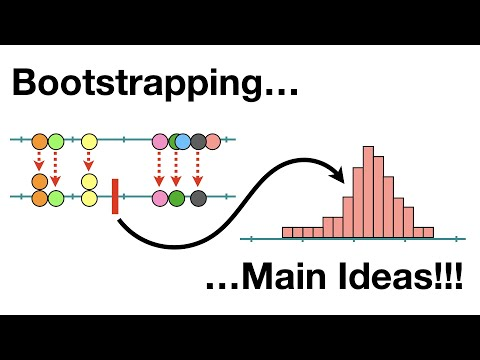

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

## 1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.


### Firstly, standard deviation measures the variability or spread of all the individual data points on a data set. Its meant to represent how much the individual data points differ from the mean of the original data set. On the contrary, the standard error of the mean (SEM), measures the variability or uncertainty in the estimate of the smple mean. It's mean to show how much the sample mean would differ if we took repeated samples from the population. Therefore, the difference in between the two is that standard deviation demonstrates the spread of individual data points on a data set. While the standard error of mean, caputres the spread of sample means across different samples in order to give us a idea of how reliable the sample mean is as an estimate of the population mean.

## 2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

### To create a 95% confidence interval using the standard eror of the mean, firstly, using the bootstrapped sample mans, you are required to calculate the mean. This is because the confidence interval is mainly centered around this value. Therefore the mean that you calculate represents the most accurate estimate of the required mean in a datset. Secondly, you hbe to compute the SEM, which will be able to efficiently tell you the variability of the bootstrappe sample means. Thirdly, in order to obtain a 95% confidence interval, you have to the multiply the SEM by the z-score, which is about 1.96. Lastly, the confidence interval is representend by the SEM x 1.96 + the calculated mean of the bootsrapped samles ( as seen in the first step). All in all, if you follow these steps, you should be abke to calculate the range that will cover 95% of the boostrapped sample means.

## 3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

### 1. Resample your data: From the original dataset, you are required to draw approximately 10 000 bootstrap samples, which I know may seem like a lot but since we aren't allowed to use the standard deviation method to estimate the standord error of the mean, we will have to do everything manually. 2. Calculate the mean for each bootstrap sample: For each of the resamples that yuou drew, you will have to calculate the mean. By calculating this, you will obtain a proper distribution of boostrapped sample means. 3. Sort the boostrapped sample means: Once you have all the distribution of the means organized, you must sort them in ascending order. This is a crucial step in the process because it allows you to easily identify the percentiles of the distribution, which will be used later on to form the desired confidence interval. 4. Identify the percentiles for a 95% confidence interval: In a confidence interval such as this one, you want it to contain the middle 95% of the sample means, leaving approximatley 2.5% on both sides of the intermission. Therefore, 100 - 2.5 = 97 and 0 + 2.5 = 2.5, so you need to identify where the 2.5th and 97th percentile is, and then configure the 95% interval. In conclusion, by locating the 2.5th and 97th interval, this will give you the 95% confiedence interval. Which in other words means that 95% of all the boostrapped sample means will fall in between this range. 

## 4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

### Initial code along with a mock sample:

In [2]:
import numpy as np

# Data 
data = [6, 8, 10, 12, 3, 1, 14, 16, 13, 15]

# Function that will execute a code that will give us a bootstrap confidence interval for the mean
def bootstrap_ci(data, num_bootstrap=10000, ci_percentile=95):
    # Generate samples
    boot_means = []
    for _ in range(num_bootstrap):
        # To generate a bootstrap sample, use replacement sampling.
        boot_sample = np.random.choice(data, size=len(data), replace=True)
        # This bootstrap sample's sample mean should be determined.
        boot_means.append(np.mean(boot_sample))
    # this function below will calculate the higher and lower percentiles for the confidence interval
    lower_bound = np.percentile(boot_means, (100 - ci_percentile) / 2)
    upper_bound = np.percentile(boot_means, 100 - (100 - ci_percentile) / 2)
    
    return lower_bound, upper_bound
#Function calculate the 95% confidence interval for the mean
ci_mean = bootstrap_ci(data)
print(f"95% bootstrap confidence interval for the mean: {ci_mean}")


95% bootstrap confidence interval for the mean: (6.7, 12.7)


### From Chatgpt
Steps:
Generate bootstrap samples: The np.random.choice(data, size=len(data), replace=True) line generates bootstrap samples by randomly sampling from the original data with replacement. Each sample has the same size as the original sample.

Calculate the mean: The np.mean(boot_sample) calculates the sample mean for each bootstrap sample, and the means are stored in the boot_means list.

Calculate percentiles for CI: The np.percentile(boot_means, ...) function extracts the 2.5th and 97.5th percentiles of the bootstrapped sample means to create the 95% confidence interval (since 95% leaves 2.5% in each tail of the distribution).

Output the result: The function returns the lower and upper bounds of the confidence interval.

## Modified Code that Chatgpt gave me to compute a confidence interval for the median

In [3]:
# Function to compute bootstrap confidence interval for the median
def bootstrap_ci_median(data, num_bootstrap=10000, ci_percentile=95):
    # Generate samples by using the for and range functions / methods
    boot_medians = []
    for _ in range(num_bootstrap):
        # Create bootstrapped samples
        boot_sample = np.random.choice(data, size=len(data), replace=True)
        # Calculate the sample median for this bootstrap sample
        boot_medians.append(np.median(boot_sample))
    
    # Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(boot_medians, (100 - ci_percentile) / 2)
    upper_bound = np.percentile(boot_medians, 100 - (100 - ci_percentile) / 2)
    
    return lower_bound, upper_bound

# Calculate the 95% confidence interval for the median
ci_median = bootstrap_ci_median(data)
print(f"95% bootstrap confidence interval for the median: {ci_median}")


95% bootstrap confidence interval for the median: (5.5, 14.0)


### From Chatgpt
Explanation of Modifications:
In this version, instead of calculating the mean with np.mean(boot_sample), we calculate the median with np.median(boot_sample). Everything else in the process remains the same.
How This Code Can Be Modified for Other Parameters:
For the variance, you would use np.var(boot_sample) instead of np.mean or np.median.
For the standard deviation, you would use np.std(boot_sample).
You can modify this for any other statistic simply by replacing the calculation within the loop that computes the statistic of interest.

## 5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

### Firstly, because a confidence interval is intended to estimate the unknown population parameter by approximating it with the sample statistic, we must distinguish between the population parameter and the sample statistic. The sample statisic, such as the sample mean or median, is calculated from the sample data; the population parameter, such as the true mean or median, is usually unknown. The range of reasonable values for the population parameter, as determined by the sample statistic's observed variability, is presented via the confidence interval. It is important to note that confidence interval express the degree of uncertainty associated with out sample statistic when it comes to approximating the true population value. 

## 6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

### 6.1: What is the process of bootstrapping? Bootstrapping is a clever way of solving the uncertainty or find an estimate such as the mean, median, or any other sort of calculated statistic without the help of complex mathematial formulas or  assumptions. Imagine you have a set of data placed in front of you such as a sample of the population or the amount of people that play a variety of sports anf you are inquiring on how reliable the average. Rather than going back and forth searching for more data which is quite literally impossible when you have an extremly large data set that can reach into the thousands or millions, you can just use the bootstrapping method.

### 6.2: In my opinion the main purpose of boostrapping is to allow you to estimate the variability of a statistic method (see the list in the question above) when you only have a limited amount of information/data given to you. It aims to help you understand how much your sample might differ from the results of the actual population value without needing to use complex formulas or know how the data is distributed. 

### 6.3: To begin, I would start by bootstrapping by randomly sampling with replacement from my original sample so that I would be able to create as many boostrap sample as I want with the same size n. Then, for each of these samples I would calculate the mean, this is useful to me because after resampling thousands of times, I'll end up with a large distribution boostrapped sample means. This is important to me because this distribution shows me the range of sample means that make sense given the variation of my first sample. Lastly, I would compare my hypothesis to the bootstrapped distribution, I'd look at where my hypothesized mean would place in my bootstrapped distribution. If it falls outide the 95% confidence interval, the my hypothesis is most likely to be implausible, on the contrary, if it falls within the 95%. Then its possible that my hypothesis was correct.

## 7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

### A confidence interval overlappying zero "fails to reject the null hypothesis" even when the observed sample itself is not zero because the confidence interval reflects the range of realistic values for the mean of the opulation based on the provided data and the variability. It covers the uncertainty in the estimate of the population parameter. Since zero can still be the genuine population mean even when the sample mean is not zero, a confidence interval spanning zero does not successfully reject the null hypothesis. This implies that the true mean may still be zero, indicating that there may not be any significant impact, due to the variability or ambiguity in the data. We cannot reject the null hypothesis even though the sample mean is not zero because the evidence is not robust enough to definitively rule out the possibility that the effect is zero. To answer the second question, if zero is not included in the confidence interval, you would reject the null hypothesis. This would imply that the true population mean cannot be zero, indicating that a real influence is probably present. In this instance, the null hypothesis is rejected because there is sufficient evidence in the data to draw the conclusion that the population mean differs from zero.

## Complete the following assignment.

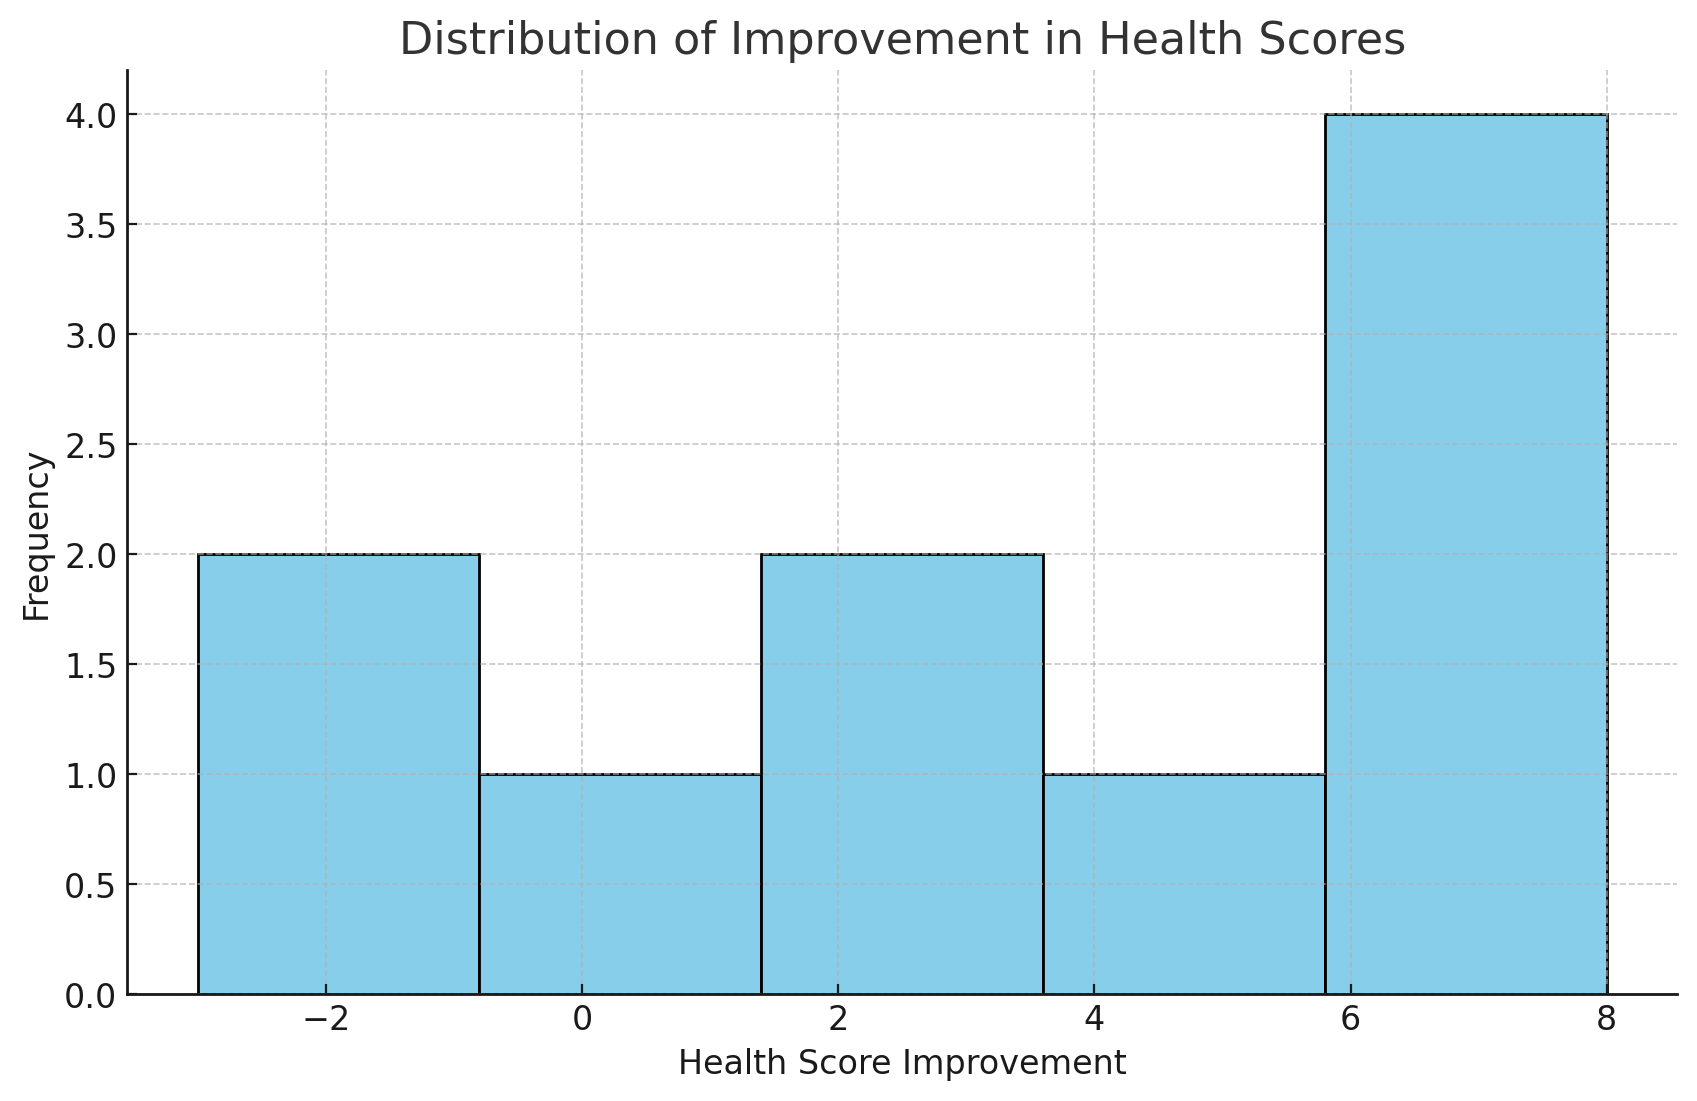

### Problem Introduction:
AliTech has developed a new vaccine intended to improve people's health. The goal of this analysis is to evaluate whether the vaccine is effective, based on the health score improvements of patients who received the vaccine. We will use statistical bootstrapping to assess the evidence for or against the effectiveness of the vaccine.

Null Hypothesis of "No Effect":
In this context, the null hypothesis assumes that the vaccine has no effect on improving health. This means any observed changes in health scores are due to random chance, not due to the vaccine. The alternative hypothesis suggests that the vaccine leads to an actual improvement in health scores.

Data Visualization:
To get an initial understanding of the health score improvements, the histogram below shows the distribution of the improvements for each patient.

The patients' improvement in health scores ranged from -3 to +8, with an average improvement of 3.3 points across all patients. The improvement distribution suggests that many patients experienced positive changes, while some saw little or no change.

Quantitative Analysis:
Bootstrapping Method:
To evaluate the effectiveness of the vaccine, we used bootstrapping to generate a confidence interval for the average improvement in health scores. Bootstrapping is a resampling technique that allows us to estimate the variability of the improvement without making assumptions about the underlying distribution of the data.

We performed 10,000 bootstrap resamples to create a 95% confidence interval for the mean improvement.

Initial Mean Health Score: 81.0
Final Mean Health Score: 84.3
Average Improvement: 3.3
Findings and Discussion:
The 95% confidence interval for the average improvement in health scores is (0.9, 5.6). This range suggests that, on average, the vaccine improves health scores by between 0.9 and 5.6 points.

Conclusion Regarding the Null Hypothesis:
Since the confidence interval does not include zero, we can reject the null hypothesis that the vaccine has no effect. This means that the data provides evidence that the vaccine is effective in improving health scores.

Further Considerations:
Further studies with larger sample sizes would help confirm these findings and better assess the variability in the vaccine’s effectiveness.

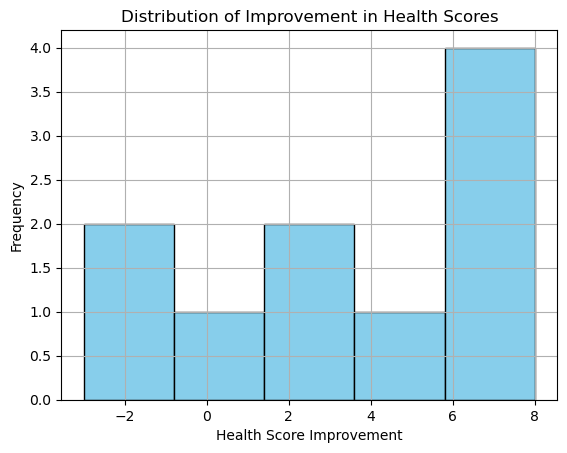

(81.0, 84.3, 3.3, (0.9, 5.6))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create the dataset provided by AliTech
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Calculate the improvement for each patient
df['Improvement'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Setting the random seed for reproducibility
np.random.seed(42)

# Visual presentation: Histogram of the Improvement
plt.hist(df['Improvement'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Improvement in Health Scores')
plt.xlabel('Health Score Improvement')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Summary statistics
initial_mean = df['InitialHealthScore'].mean()
final_mean = df['FinalHealthScore'].mean()
mean_improvement = df['Improvement'].mean()

# Bootstrapping methodology
def bootstrap_ci(data, num_bootstrap=10000, ci_percentile=95):
    boot_means = []
    for _ in range(num_bootstrap):
        boot_sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(boot_sample))
    
    lower_bound = np.percentile(boot_means, (100 - ci_percentile) / 2)
    upper_bound = np.percentile(boot_means, 100 - (100 - ci_percentile) / 2)
    
    return lower_bound, upper_bound

# Quantitative analysis: Bootstrapped confidence interval for improvement
ci_improvement = bootstrap_ci(df['Improvement'])

# Displaying findings
initial_mean, final_mean, mean_improvement, ci_improvement


### Chatbot summary: 
Certainly! Here's a summary of what we discussed today:

Standard Error in Bootstrapping:

Bootstrapping is a statistical method that resamples data to estimate variability in a statistic, like the mean or median.
The standard error in bootstrapping measures how much the resampled estimates (e.g., the mean) vary from one another.
Creating a Confidence Interval Using Bootstrapping:

You can use the bootstrapped sample means and the np.quantile() function to create a 95% confidence interval. The confidence interval gives a range of plausible values for a population parameter (e.g., the mean) based on the data variability.
Why a Confidence Interval Overlapping Zero Fails to Reject the Null Hypothesis:

Even if the sample mean is not zero, if the confidence interval includes zero, it means the true population mean could still plausibly be zero. This leads to failing to reject the null hypothesis, as we can’t rule out no effect.
Rejecting the Null Hypothesis:

You would reject the null hypothesis if the confidence interval does not include zero, suggesting that the true mean is likely not zero and the effect is statistically significant.
AliTech Vaccine Analysis:

We analyzed the effectiveness of a new vaccine from AliTech using a dataset of 10 patients.
The analysis used bootstrapping to create a 95% confidence interval for the average improvement in health scores.
The 95% confidence interval for improvement was (0.9, 5.6), suggesting the vaccine has a positive effect.
Since the confidence interval does not include zero, we rejected the null hypothesis and concluded that the vaccine likely improves health.

https://chatgpt.com/share/67019076-5c1c-800c-8ae8-0f6129662c49